In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import seaborn as sns

The data for Real Estate has been downloaded from 
https://archive.ics.uci.edu/ml/machine-learning-databases/00477/

In [57]:
# Import the dataset as a dataframe using the pandas package
real= pd.read_csv("H:/Krishna/GCU/DSC 540/Topic 1/Real estate valuation data set.csv",sep=',', header=0)

In [58]:
# Get the structure of the dataframe
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [59]:
# View sample of the dataset
real.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Text(0, 0.5, 'Distance from MRT')

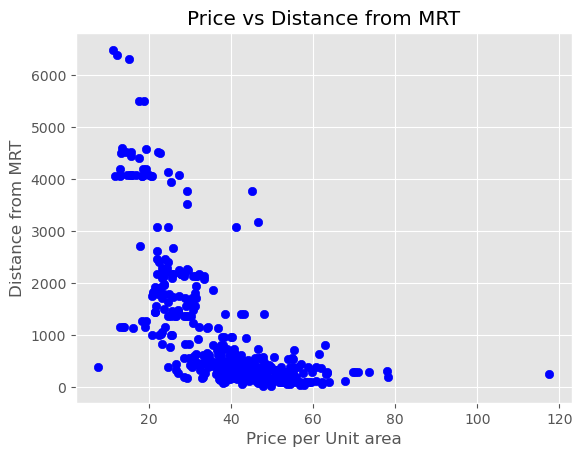

In [64]:
# Let us try to plot and find how the Response variable Price per unit area against all its predictor variables
# Price vs Distance from MRT station
plt.scatter(real[['Y house price of unit area']], real[['X3 distance to the nearest MRT station']], c='blue')
plt.title('Price vs Distance from MRT')
plt.xlabel('Price per Unit area')
plt.ylabel('Distance from MRT')

We can see that as the distance from the MRT increases the price of the house decreases

Text(0, 0.5, 'Price per Unit area')

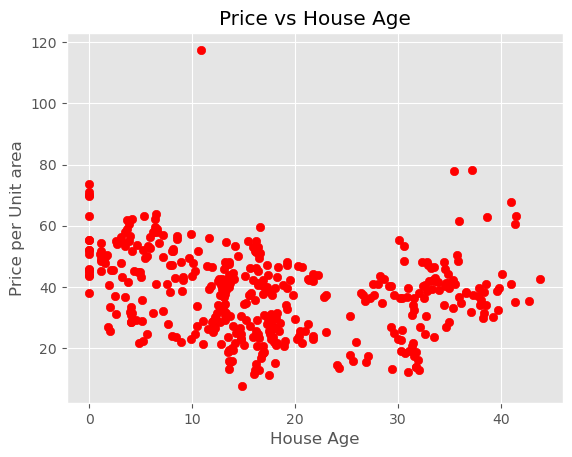

In [68]:
# Price vs House Age
plt.scatter(real[['X2 house age']], real[['Y house price of unit area']], c='red')
plt.title('Price vs House Age')
plt.xlabel('House Age')
plt.ylabel('Price per Unit area')

We do see some newly built homes are highly priced but overall we see that the price is evenly distributed across age with a slight drop in price when the houses age.

Text(0, 0.5, 'Price per Unit area')

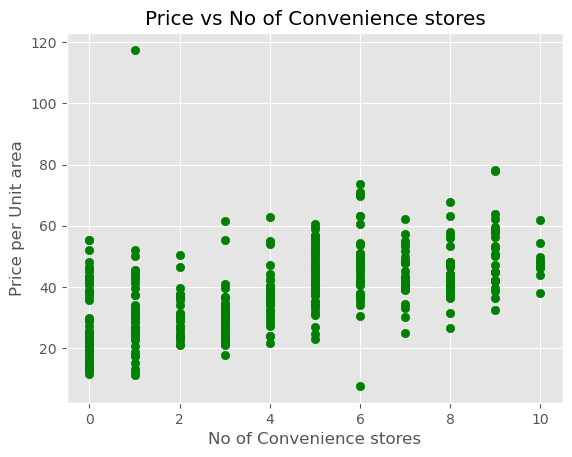

In [69]:
# Price vs Convenience Stores
plt.scatter(real[['X4 number of convenience stores']], real[['Y house price of unit area']], c='green')
plt.title('Price vs No of Convenience stores')
plt.xlabel('No of Convenience stores')
plt.ylabel('Price per Unit area')

From the plot we can see that as the number of stores increase the price of the houses also tend to raise gradually.

In [21]:
# Split the data into Test and Training dataset
real_train, real_test = train_test_split(real, test_size=0.4, random_state=123)

In [22]:
real_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 396 to 365
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      248 non-null    int64  
 1   X1 transaction date                     248 non-null    float64
 2   X2 house age                            248 non-null    float64
 3   X3 distance to the nearest MRT station  248 non-null    float64
 4   X4 number of convenience stores         248 non-null    int64  
 5   X5 latitude                             248 non-null    float64
 6   X6 longitude                            248 non-null    float64
 7   Y house price of unit area              248 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 17.4 KB


In [23]:
real_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 188 to 347
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      166 non-null    int64  
 1   X1 transaction date                     166 non-null    float64
 2   X2 house age                            166 non-null    float64
 3   X3 distance to the nearest MRT station  166 non-null    float64
 4   X4 number of convenience stores         166 non-null    int64  
 5   X5 latitude                             166 non-null    float64
 6   X6 longitude                            166 non-null    float64
 7   Y house price of unit area              166 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 11.7 KB


In [24]:
# Split the test and training dataframe as response variable and Independent variables
# The Response variable is the Price of Unit area of the house
# The independent variables are House age, Distance from Metro Rail and Number of convenience stores closer to the house
X_train = real_train[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]
y_train = real_train[['Y house price of unit area']]
X_test = real_test[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]
y_test = real_test[['Y house price of unit area']]

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 396 to 365
Data columns (total 3 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            248 non-null    float64
 1   X3 distance to the nearest MRT station  248 non-null    float64
 2   X4 number of convenience stores         248 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.8 KB


In [26]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 396 to 365
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Y house price of unit area  248 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [31]:
# Let us run the linear regression to predict the cost per unit area of the house.
# We will use the Linearregression function from the Linear_Model
ols = linear_model.LinearRegression()
model = ols.fit(X_train, y_train)

In [28]:
# The Coefficients of the Model can be given by the below function
model.coef_

array([[-0.22667982, -0.00561765,  1.14814398]])

We can say from the above output the Model coefficients for all Input variable are

Coefficient of House age, b1-> -0.22667982
Coefficient of Distance to MRT station, b2 -> -0.00561765
Coefficient of Number of convenience store, b3 -> 1.14814398

In [29]:
# The model intecept can be given as 
model.intercept_

array([43.34493233])

The Multiple Linear regression equation for the House Price per Unit area can be given as

**House price per unit area (y) = 43.34 + (-0.227)* House Age + (-0.006)* Distinace to MRT station + 1.148* Number of Convenience stores** 

In [30]:
# The model score (R-squared) can be identified by the score function
model.score(X_train,y_train)

0.48179836059668957

**The R-squared for the model is at 48.2%**

In [33]:
# The House price per unit area can be predicted for the test dataset as follows
y_pred=ols.predict(X_test)

In [34]:
X_output = X_test

In [36]:
X_output['Predicted Price'] = y_pred
X_output['Actual Price'] = y_test

<ipython-input-36-1acbb42baf74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_output['Predicted Price'] = y_pred
<ipython-input-36-1acbb42baf74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_output['Actual Price'] = y_test


In [37]:
# The Predicted and the actual price of the test data can be seen in the dataframe below
X_output.head(5)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Predicted Price,Actual Price
188,34.8,190.0392,8,43.574053,44.3
404,16.4,289.3248,5,43.742778,41.2
191,13.2,750.0704,2,38.435415,37.8
101,12.7,170.1289,1,40.658518,32.9
210,5.2,390.5684,5,45.712841,52.2


In [39]:
#The mean square error of the model can be given as
mean_squared_error(y_test, y_pred)

62.86779419807648

In [41]:
# We can also do Multiple lear regression using the statsmodels.api
# In order to do that we may need to add a constant for the intercept to our training Input variables first
X_train = sm.add_constant(X_train)


In [42]:
# The model can be fitted using the OLS (Ordinary Least Square) function
model_sm = sm.OLS(y_train, X_train).fit()

In [44]:
# The model summary can be found by
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.482
Model:                                    OLS   Adj. R-squared:                  0.475
Method:                         Least Squares   F-statistic:                     75.62
Date:                        Sun, 08 Aug 2021   Prob (F-statistic):           1.29e-34
Time:                                16:17:55   Log-Likelihood:                -922.62
No. Observations:                         248   AIC:                             1853.
Df Residuals:                             244   BIC:                             1867.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     43.3449      1.852     23.410      0.000      39.698      46.992
X2 house age                              -0.2267      0.056     -4.084      0.000      -0.336      -0.117
X3 distance to the nearest MRT station    -0.0056      0.001     -8.879      0.000      -0.007      -0.004
X4 number of convenience stores            1.1481      0.268      4.289      0.000       0.621       1.675
==============================================================================
Omnibus:                      154.494   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2283.134
Skew:                           2.155   Prob(JB):                         0.00
Kurtosis:                      17.226   Cond. No.                     4.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The significance of using the statsmodels package is that we can use the summary function to print out all the important statistics of the model.
The summary also provides the p-value of the Independent variable used. We can say that when the p value is greater than 0.05 (which is our Null hypothesis) we can safely say that the variance in the Independent variable do not have statistical impact on the Reponse variable.
Here we can see that the p-value (P>|t|) of all the independent variable is less that 0.05, meaning we can safely reject the null hypothesis and say that all our three independent variable impact the prediction of the House price per square area.

We can also see that the result of Durbin Watson test is 1.9 and we can say that there are no issues with respect to aut-correlation between the variables selected for the model.


Text(0.5, 0, 'Actual House Price')

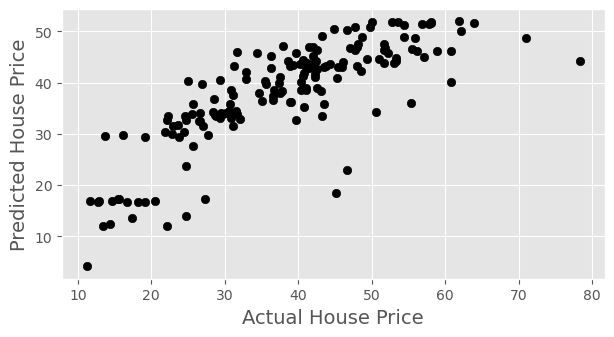

In [53]:
# Scatter Plot for the Actual vs the Predicted House Price
plt.style.use('default')
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 3.5))
ax.scatter(y_test, y_pred, color='k', label='Predicted vs Actual Model')
ax.set_ylabel('Predicted House Price', fontsize=14)
ax.set_xlabel('Actual House Price', fontsize=14)

C:\Users\ua58809\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ua58809\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

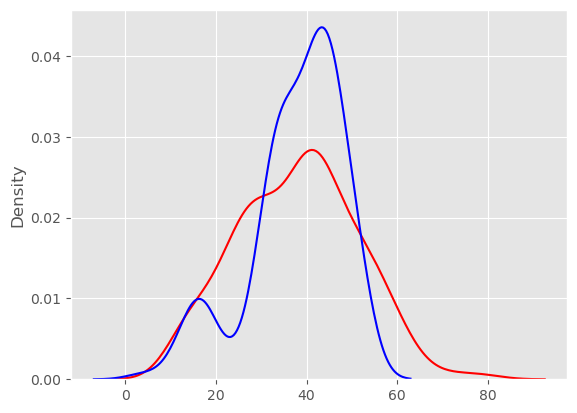

In [55]:
# In order to visually compare the performance of the Model we can use the distplot function from the Seaborn package to see how the predicted value compares with the actual value
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)